In [112]:
test_name=['202503.csv','202502.csv','202501.csv','202412.csv','202411.csv','202410.csv','202409.csv','202408.csv','202407.csv']
train_name=['202406.csv','202405.csv','202404.csv','202403.csv','202402.csv','202401.csv',
            '202312.csv','202311.csv','202310.csv','202309.csv','202308.csv','202307.csv','202306.csv','202305.csv','202304.csv','202303.csv','202302.csv','202301.csv',
            '202212.csv','202211.csv','202210.csv','202209.csv','202208.csv','202207.csv','202206.csv','202205.csv','202204.csv','202203.csv','202202.csv','202201.csv',
            '202112.csv','202111.csv','202110.csv','202109.csv','202108.csv','202107.csv','202106.csv','202105.csv','202104.csv','202103.csv','202102.csv','202101.csv',
            ]
import warnings
warnings.filterwarnings("ignore")

In [113]:
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from keras.models import Model
from keras.layers import Input, Conv1D, MaxPooling1D, LSTM, Dense, Dropout, Attention, Flatten
from keras.utils import to_categorical
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
# report 缺失情况
def report_missing_data(df):
    missing_data = df.isnull().sum()
    missing_data = missing_data[missing_data > 0]
    if not missing_data.empty:
        print("Missing data report:")
        print(missing_data)
    else:
        print("No missing data found.")
for i in test_name+train_name:
    df = pd.read_csv(i)
    print(f"Report for {i}:")
    report_missing_data(df)

Report for 202503.csv:
Missing data report:
R&D                     52
OperatingProfitRatio    23
ROA                     46
GrossProfit             46
PEG                      6
dtype: int64
Report for 202502.csv:
Missing data report:
R&D                     50
OperatingProfitRatio    22
ROA                     46
GrossProfit             46
PEG                      6
dtype: int64
Report for 202501.csv:
Missing data report:
VMA                     300
R&D                      50
OperatingProfitRatio     22
ROA                      46
GrossProfit              46
PEG                       6
dtype: int64
Report for 202412.csv:
Missing data report:
R&D                     50
OperatingProfitRatio    22
ROA                     46
GrossProfit             46
PEG                      6
dtype: int64
Report for 202411.csv:
Missing data report:
VMA                     300
R&D                      51
OperatingProfitRatio     24
ROA                      46
GrossProfit              46
PEG            

In [114]:
from sklearn.impute import KNNImputer
import pandas as pd
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()

imputer = KNNImputer(n_neighbors=5)
yname='rank10_next'  # 目标变量名称
def process(df):
    df1 = df.dropna(thresh=20, axis=0)
    df1= df1.dropna(subset=[yname],axis=0)
    l=['StockCode','StockName','VMA','rank10','rank2','rank10_next','rank2_next','MonthlyReturn_next','MonthlyReturn']
    x = df1.drop(columns=l)
    
    x1 = imputer.fit_transform(x)
    x = pd.DataFrame(x1, columns=x.columns)
    #print nan number of each column
    #print(x.isnull().sum())
    
    x2 = scaler.fit_transform(x)
    x = pd.DataFrame(x2, columns=x.columns,index=df1.index)  # 这里可能出错！
    y = df1[yname]
    
    return pd.concat([x, y], axis=1),df1

In [115]:
import pandas as pd
df_train=pd.DataFrame()
df_test=pd.DataFrame()
# read all train files and add to df_train
for i in train_name:
    df=pd.read_csv(i)
    df,_=process(df)
    df_train=pd.concat([df_train,df],axis=0)
for i in test_name:
    df=pd.read_csv(i)
    df,_=process(df)
    df_test=pd.concat([df_test,df],axis=0)
df_train.dropna(inplace=True)
df_test.dropna(inplace=True)


In [116]:
x_train=df_train.drop(columns=[yname])
y_train=df_train[yname]
x_test=df_test.drop(columns=[yname])
y_test=df_test[yname]

#save x_train to csv
x_train.to_csv('x_train.csv',index=False)

x_train


,MonthlyTurnoverRate,MonthlyTradingAmount,MonthlyTradingVolume,ATR,ADTM,AssetTurnover,NetProfit,R&D,BBIBOLL,MACD,...,EPS,ROC,MASS,BBI,PB,PE,PEG,VR,PSY,WVAD
0,-1.134938,-0.534558,-0.077186,-0.458836,0.577593,-1.288432,0.655936,-0.132354,-0.342926,0.234863,...,-0.107149,0.639267,0.073228,-0.342926,-0.985570,-0.244862,-0.175736,1.668357,0.612559,0.117666
1,-0.749348,-0.627890,-0.687184,-0.245068,-0.838771,-0.895602,-0.322350,-0.448454,-0.097315,-0.019903,...,-0.278729,-0.447114,0.723244,-0.097315,-0.353245,0.982281,-0.097581,-0.837819,-0.676392,-0.540550
2,-0.701634,-0.662039,2.159331,-0.486043,-0.486677,-0.217795,-0.357681,-0.455067,-0.410873,0.214272,...,-0.429899,-0.349315,0.923467,-0.410873,-0.647632,1.561470,-0.091573,-0.973060,-2.886023,0.656830
3,-0.311873,-0.300732,0.215505,-0.276162,0.201709,-0.195428,-0.121980,-0.280474,-0.332503,0.236027,...,-0.287774,0.277438,-0.190797,-0.332503,-0.052365,-0.070095,-0.147897,0.223658,0.428423,0.173618
4,-0.805177,-0.668570,-0.192162,-0.454949,0.681821,-1.279700,0.308120,0.039950,-0.360686,0.192059,...,-0.037611,0.071899,-0.075906,-0.360686,-0.995734,-0.286907,-0.091118,0.080201,0.428423,0.006751
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,-0.737313,0.356233,-0.537170,1.798285,0.961852,0.349095,-0.141650,-0.077518,2.239469,1.956376,...,1.453090,0.289325,0.518811,2.239469,2.325824,0.083495,0.285852,0.634660,1.589461,-0.259763
294,-0.321464,-0.043053,-0.561127,4.087617,1.331124,1.266128,-0.310792,-0.489473,3.416662,2.244666,...,1.626273,1.116565,-0.030755,3.416662,4.931761,0.510723,-0.030706,1.400592,1.743048,-0.261855
295,0.187018,-0.732074,-0.569101,1.026163,-0.285017,-0.137628,-0.314839,-0.497214,0.376299,-0.713139,...,0.307300,-0.805871,-0.891582,0.376299,0.628822,-0.103608,0.419331,-0.944197,0.360764,-0.309440
296,0.360626,-0.443774,-0.572758,5.387465,0.283070,-0.680603,-0.329964,-0.518894,4.116618,5.837446,...,0.801923,-0.107966,-0.336667,4.116618,2.001716,0.826236,0.061364,0.750190,-0.867933,-0.317746


In [117]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import TimeSeriesSplit
import pandas as pd

# 假设 x_train_scaled 是标准化后的 DataFrame，y_train 是分类标签（1-10）
import tensorflow as tf
from tensorflow.keras import layers, models

def build_model(input_shape):
    inputs = Input(shape=input_shape)
    
    # CNN层，用于特征提取
    x = Conv1D(64, kernel_size=3, activation='relu')(inputs)
    x = MaxPooling1D(pool_size=2)(x)
    x = Dropout(0.3)(x)
    
    # LSTM层，用于捕捉时间序列特征
    x = LSTM(128, return_sequences=True)(x)
    
    # 注意力机制
    attention = Attention()([x, x])
    x = Flatten()(attention)
    
    # 全连接层，用于分类
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.3)(x)
    output = Dense(10, activation='softmax')(x)  # 十分类输出
    
    # 定义模型
    model = Model(inputs, output)
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model


In [119]:
from sklearn.metrics import mean_absolute_error
from scipy.stats import spearmanr
all=test_name+train_name
all=all[::-1]  # reverse the order to make sure the latest data is at the top
return_data=pd.DataFrame()
accuracy_list = []
mse_list = []
spear_list = []
ic_list = []
for i in range(6, len(all)):
    test_names = all[i]
    train_names = all[i-6:i]
    
    df_train=pd.DataFrame()
    for i in train_names:
        df=pd.read_csv(i)
        df,_=process(df)
        df_train=pd.concat([df_train,df],axis=0)
    df_train.dropna(inplace=True)
    x_train=df_train.drop(columns=[yname])
    y_train=df_train[yname]
    X_train=x_train.values
    input_shape = (X_train.shape[1], 1)  # 输入形状（特征数量，1）
    #model= build_model(x_train, y_train,mod=4)
    model = build_model(input_shape)

    # 编译模型
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    x=df.drop(columns=[yname])
    y_pred_prob = model.predict(x)
    print("预测结果的形状：", y_pred_prob.shape)
    df=pd.read_csv(test_names)
    df,dfcom=process(df)
    mr=dfcom['MonthlyReturn_next']
    #df=df.dropna(subset=[yname],axis=0)
    x=df.drop(columns=[yname])
    y=df[yname]
    # for every sample in x, give me the weighted sum of predicted probabilities
    x = x.values  # 转为 numpy 数组
    y_pred_prob = model.predict(x)
    y_pred_prob = pd.DataFrame(y_pred_prob,index=df.index)  # 转为 DataFrame
    y_pred_prob.columns = ['rank0','rank_1','rank_2','rank_3','rank_4','rank_5','rank_6','rank_7','rank_8','rank_9']
    y_pred_prob['score']= y_pred_prob['rank_1']*1 + y_pred_prob['rank_2']*2 + y_pred_prob['rank_3']*3 + y_pred_prob['rank_4']*4 + y_pred_prob['rank_5']*5 + y_pred_prob['rank_6']*6 + y_pred_prob['rank_7']*7 + y_pred_prob['rank_8']*8 + y_pred_prob['rank_9']*9 
    fil=pd.concat([mr,y_pred_prob['score']],axis=1)
    fil['rank'] = pd.qcut(fil['score'], 10, labels=False)
    
    accuracy=accuracy_score(y, fil['rank'])
    accuracy_list.append(accuracy)
    
    mse= mean_absolute_error(y, fil['rank'])
    mse_list.append(mse)
    
    spear, _ = spearmanr(y, fil['rank'])
    spear_list.append(spear)
    
    ic= fil['score'].corr(mr)
    ic_list.append(ic)
    # 计算每个类别的MonthlyReturn平均值
    mean_mr = fil.groupby('rank')['MonthlyReturn_next'].mean()
    # 将平均值add to return_data
    mean_mr = pd.DataFrame(mean_mr)
    mean_mr.columns = [i]
    mean_mr = mean_mr.T
    print(f'Monyth: {test_name[:-4]}, Accuracy: {accuracy:.4f}, MSE: {mse:.4f}, Spearman Correlation: {spear:.4f}, Information Coefficient: {ic:.4f}')
    return_data = pd.concat([return_data, mean_mr], axis=0)
    
all=all[6:]
return_data.columns=['0','1','2','3','4','5','6','7','8','9']
return_data.index = [i[:-4] for i in all]


accuracy_df = pd.DataFrame(accuracy_list, index=[i[:-4] for i in all], columns=['accuracy'])
mse_df = pd.DataFrame(mse_list, index=[i[:-4] for i in all], columns=['mean_absolute_error'])
spear_df = pd.DataFrame(spear_list, index=[i[:-4] for i in all], columns=['spearman_correlation'])
ic_df = pd.DataFrame(ic_list, index=[i[:-4] for i in all], columns=['information_coefficient'])

ir=spear_df['spearman_correlation'].mean() / spear_df['spearman_correlation'].std()
print(f"Information Ratio: {ir:.4f}")
print(f'mean ic: {ic_df["information_coefficient"].mean():.4f}')
return_data

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
预测结果的形状： (282, 10)
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Monyth: ['202503.csv', '202502.csv', '202501.csv', '202412.csv', '202411.csv'], Accuracy: 0.0810, MSE: 3.0317, Spearman Correlation: 0.1316, Information Coefficient: 0.1131
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
预测结果的形状： (284, 10)
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Monyth: ['202503.csv', '202502.csv', '202501.csv', '202412.csv', '202411.csv'], Accuracy: 0.1123, MSE: 3.1474, Spearman Correlation: 0.0899, Information Coefficient: 0.0866
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
预测结果的形状： (285, 10)
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Monyth: ['202503.csv', '202502.csv', '202501.csv', '202412.csv', '202411.csv'], Accuracy: 0.1115, MSE: 3.3519, Spearman Correlation: 0.0011, Information Coefficient: 0.0821
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
预测结果的形状： (287, 10)
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Monyth: ['202503.csv', '202502.csv', '202501.csv', '202412.csv', '202411.csv'], Accuracy: 0.1254, MSE:

,0,1,2,3,4,5,6,7,8,9
202107,-2.901211,4.182443,7.565485,6.243654,15.563055,5.452265,8.435779,8.830030,6.132091,5.508023
202108,-2.588708,0.817841,-0.685511,-2.772704,0.987616,-1.046413,2.407047,3.265822,2.245302,2.894075
202109,-0.488334,-1.673769,0.867417,3.297972,0.987354,-0.342093,-1.399777,3.558118,0.689233,1.748323
202110,-2.327462,-0.290790,0.686286,3.123327,-1.046044,0.071282,-3.873003,-2.175704,3.253332,1.800723
202111,-1.133846,-1.034340,0.814126,4.143710,1.345592,4.563125,3.763718,5.472728,7.179093,7.794281
202112,-7.621884,-8.495164,-10.524719,-12.763083,-7.535698,-9.288564,-6.847124,-4.451676,-5.234276,-5.564921
202201,2.839075,2.810330,6.619469,3.741189,3.116610,0.707843,2.585159,1.477278,3.692806,3.506257
202202,-9.679695,-8.167692,-7.782140,-9.055416,-5.948989,-6.346658,-4.588234,-8.807869,-10.204291,-8.019347
202203,-6.389800,-8.014063,-3.417585,-2.248512,-7.430421,-3.106773,-4.312716,-3.891688,-8.541487,-5.139980
202204,8.065295,5.643062,4.737083,6.669584,4.887542,7.199815,5.390843,-1.875124,4.004944,0.769014


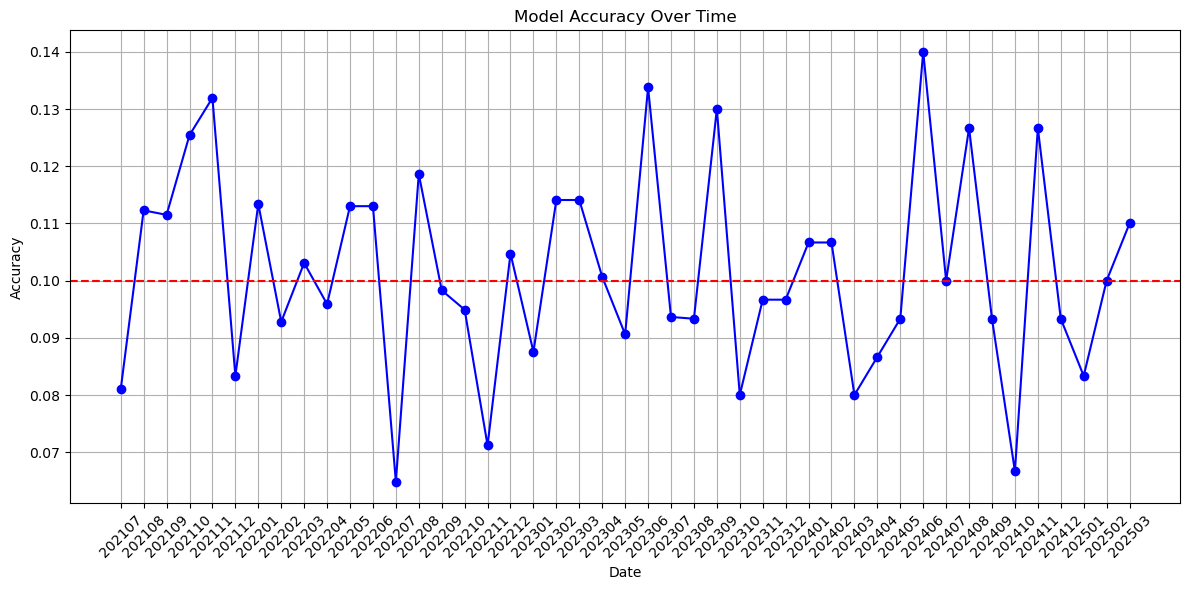

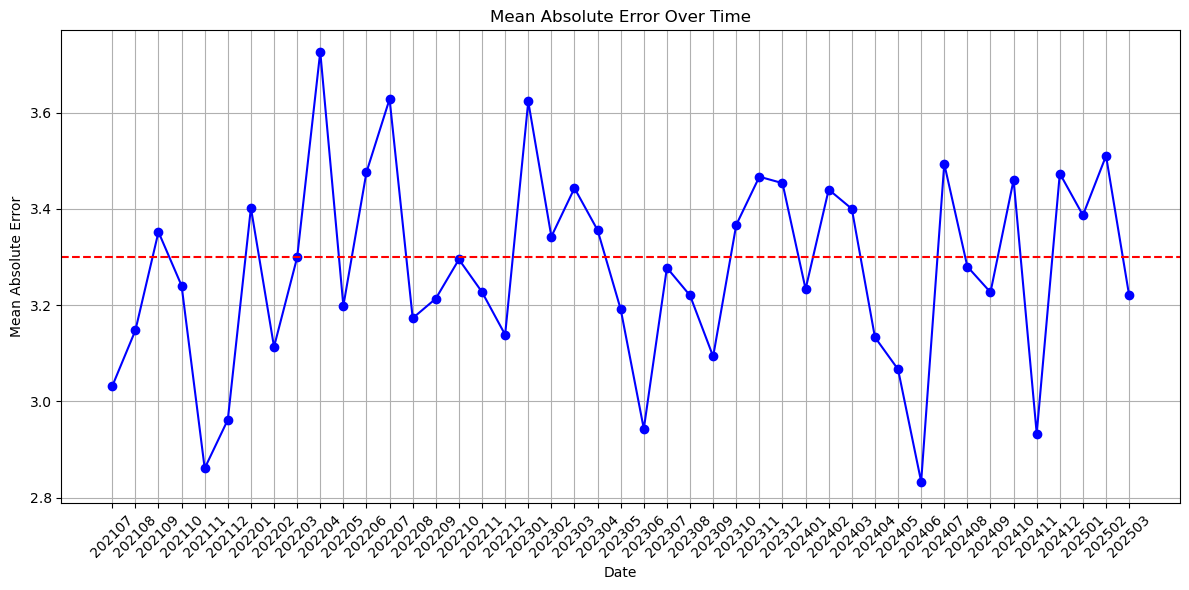

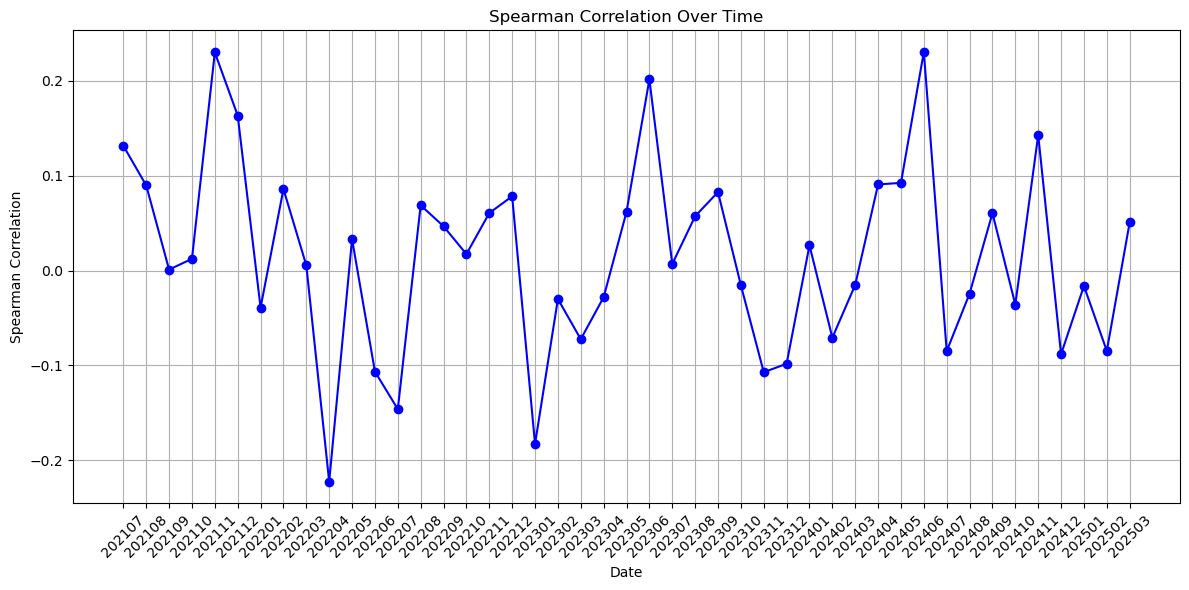

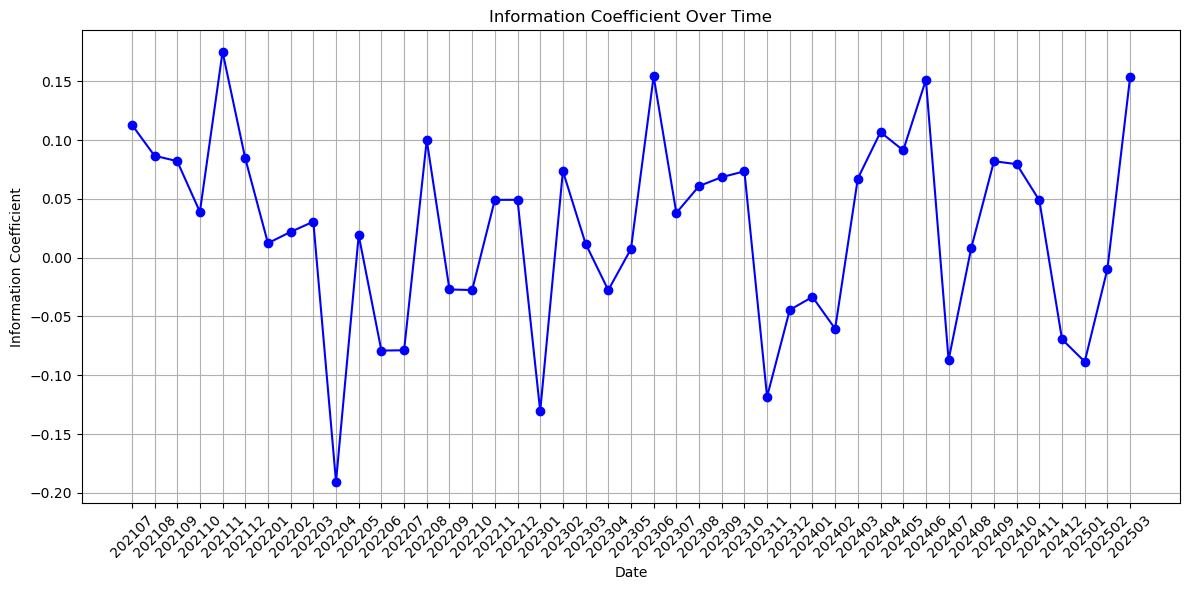

In [120]:
# draw accuracy_df
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(accuracy_df.index, accuracy_df['accuracy'], marker='o', linestyle='-', color='b')
# draw a 0.1 baseline
plt.axhline(y=0.1, color='r', linestyle='--', label='Baseline (0.1)')
# draw a 202407 vertical line
#plt.axvline(x='202407', color='g', linestyle='--', label='202407')
plt.title('Model Accuracy Over Time')
plt.xlabel('Date')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(mse_df.index, mse_df['mean_absolute_error'], marker='o', linestyle='-', color='b')
# draw a 202407 vertical line
#plt.axvline(x='202407', color='g', linestyle='--', label='202407')
plt.axhline(y=3.3, color='r', linestyle='--', label='Baseline')
plt.title('Mean Absolute Error Over Time')
plt.xlabel('Date')
plt.ylabel('Mean Absolute Error')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(spear_df.index, spear_df['spearman_correlation'], marker='o', linestyle='-', color='b')
# draw a 202407 vertical line
#plt.axvline(x='202407', color='g', linestyle='--', label='202407')
plt.title('Spearman Correlation Over Time')
plt.xlabel('Date')
plt.ylabel('Spearman Correlation')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(ic_df.index, ic_df['information_coefficient'], marker='o', linestyle='-', color='b')
#plt.axvline(x='202407', color='g', linestyle='--', label='202407')
plt.title('Information Coefficient Over Time')
plt.xlabel('Date')
plt.ylabel('Information Coefficient')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

In [121]:
value=pd.DataFrame()
for i in ['0','1','2','3','4','5','6','7','8','9']:
    rate=return_data[i].values
    # 初始净值为1,rate为每个月的收益率，给我净值变化序列
    ori=1
    v=[]
    for j in rate:
        ori=ori*(100+j)/100
        v.append(ori)
    value[i]=v
value.index=return_data.index
value

,0,1,2,3,4,5,6,7,8,9
202107,0.970988,1.041824,1.075655,1.062437,1.155631,1.054523,1.084358,1.088300,1.061321,1.055080
202108,0.945852,1.050345,1.068281,1.032978,1.167044,1.043488,1.110459,1.123842,1.085151,1.085615
202109,0.941233,1.032765,1.077548,1.067046,1.178567,1.039918,1.094915,1.163830,1.092630,1.104595
202110,0.919326,1.029761,1.084943,1.100373,1.166238,1.040660,1.052509,1.138508,1.128177,1.124486
202111,0.908902,1.019110,1.093775,1.145969,1.181931,1.088146,1.092122,1.200816,1.209170,1.212131
202112,0.839627,0.932535,0.978659,0.999708,1.092864,0.987073,1.017343,1.147359,1.145878,1.144677
202201,0.863465,0.958742,1.043441,1.037109,1.126925,0.994060,1.043643,1.164309,1.188194,1.184813
202202,0.779884,0.880435,0.962239,0.943195,1.059884,0.930970,0.995758,1.061758,1.066947,1.089798
202203,0.730051,0.809877,0.929353,0.921987,0.981130,0.902047,0.952814,1.020438,0.975814,1.033783
202204,0.788932,0.855578,0.973378,0.983479,1.029083,0.966993,1.004179,1.001304,1.014894,1.041733


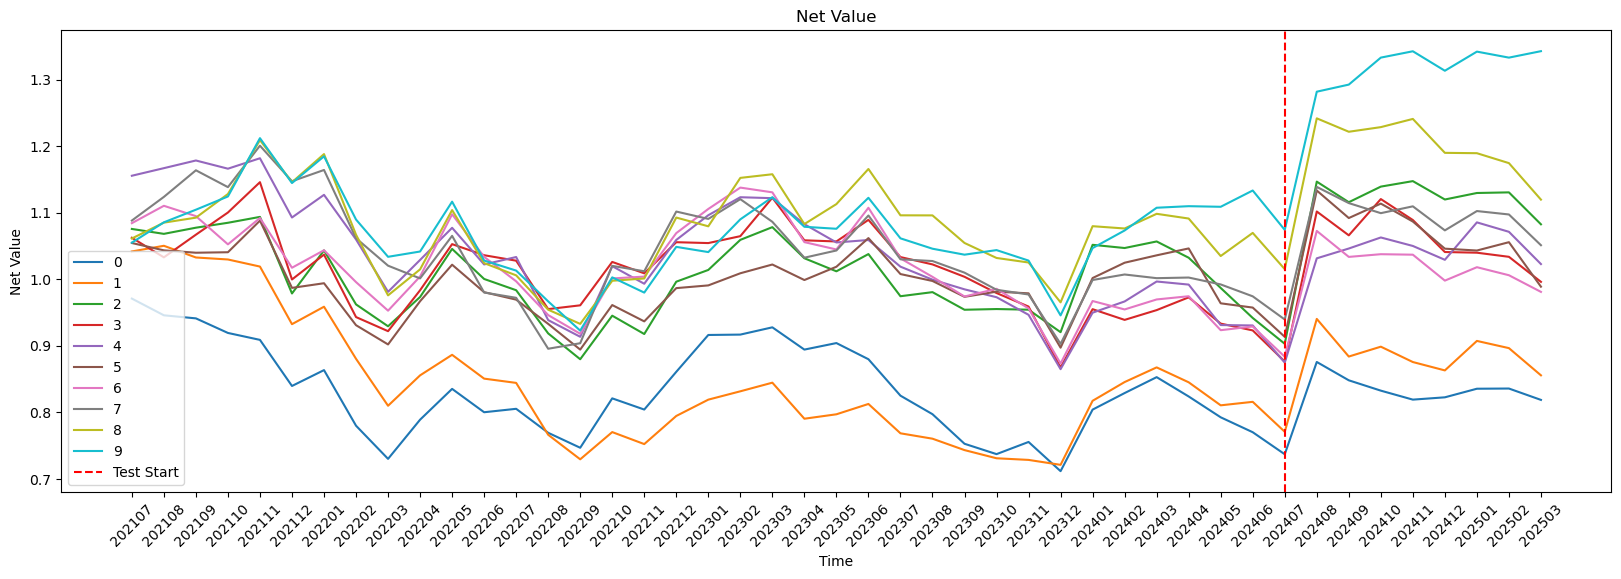

In [122]:
from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize=(20, 6))
# draw value[i] as a line chart
for i in ['0','1','2','3','4','5','6','7','8','9']:
    plt.plot(value[i], label=i)
# set x-axis ticks to be the index of return_data
plt.xticks(ticks=range(len(return_data.index)), labels=return_data.index, rotation=45)
# 202407的地方标注test 开始
plt.axvline(x=return_data.index.get_loc('202407'), color='red', linestyle='--', label='Test Start')
plt.title('Net Value')
plt.xlabel('Time')
plt.ylabel('Net Value')
plt.legend()
plt.show()

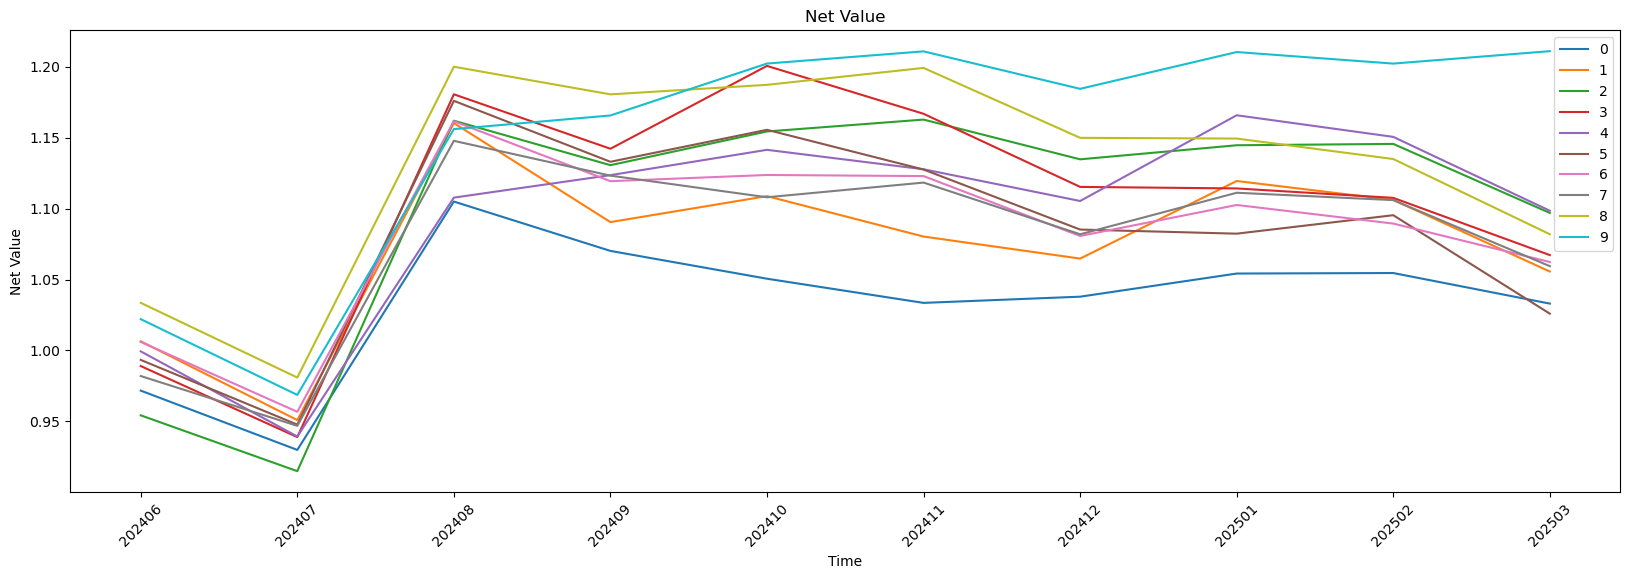

In [123]:
value_test=pd.DataFrame()
returntest=return_data.loc['202406':]
for i in ['0','1','2','3','4','5','6','7','8','9']:
    rate=returntest[i].values
    # 初始净值为1,rate为每个月的收益率，给我净值变化序列
    ori=1
    v=[]
    for j in rate:
        ori=ori*(100+j)/100
        v.append(ori)
    value_test[i]=v
value_test.index=returntest.index
plt.figure(figsize=(20, 6))
# draw value[i] as a line chart
for i in ['0','1','2','3','4','5','6','7','8','9']:
    plt.plot(value_test[i], label=i)
plt.xticks(ticks=range(len(returntest.index)), labels=returntest.index, rotation=45)
plt.title('Net Value')
plt.xlabel('Time')
plt.ylabel('Net Value')
plt.legend()
plt.show()